## Methodology
I used IBM Skills Network Labs to create notebook. I used the Boroughs, Zip Codes, Latitude and Longitude informations for Jacksonville. I also looked at the population for each zip code to find where most populous areas. 

In [3]:
## Import packages needed for project
!pip install beautifulsoup4
!pip install lxml
!pip install requests
import json
import numpy as np 
import pandas as pd #import pandas as pd
import requests # library to handle requests
from bs4 import BeautifulSoup

     |████████████████████████████████| 122kB 23.7MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 6.3MB/s eta 0:00:01


### Below is a website I scraped using BeautifulSoup which shows the percentage growth over the last decade. 

In [4]:
#scrape data and convert into dataframe
source = requests.get('https://worldpopulationreview.com/us-cities/jacksonville-population/').text
soup = BeautifulSoup(source,'lxml')
table=soup.find('table')
table_rows = table.find_all('tr')
l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td]
    l.append(row)
jvillePop = pd.DataFrame(l, columns=["Year", "Population","Growth",  "Annual Growth Rate"])  
jvillePop.drop(jvillePop.index[0], inplace=True)
jvillePop.drop('Population',axis=1,inplace=True)
jvillePop.drop('Growth',axis=1,inplace=True)
jvillePop.reset_index(drop=True, inplace=True)
jvillePop

,Year,Annual Growth Rate
0,2020,1.87%
1,2019,1.91%
2,2018,1.95%
3,2017,1.91%
4,2016,2.13%
5,2015,1.95%
6,2014,1.63%
7,2013,1.14%
8,2012,1.14%
9,2011,0.95%


### Below is a dataframe of the borough/districts of Jacksonville with the zip codes and poulations.

In [5]:
#Fetch the file of Jacksonville Zip Cdes and population.
boroughZips = pd.read_csv('JVilleZipsPop.csv')
boroughZips

,Borough,Zip Codes,Population
0,Urban Core,32202,7915
1,Urban Core,32204,6906
2,Westside,32205,28225
3,Urban Core,32206,17669
4,Arlington,32207,3306
5,Northside,32208,30879
6,Urban Core,32209,34305
7,Westside,32210,59080
8,Arlington,32211,30501
9,Westside,32212,1959


### Below is a summary of population by Jacksonville population by borough/district.

In [6]:
Poptot=boroughZips[['Borough','Population']].groupby(['Borough']).sum()
Poptot.reset_index(inplace=True)
Poptot=Poptot.sort_values(by=['Population'])
Poptot

,Borough,Population
1,Beaches,58413
4,Urban Core,66795
2,Northside,138515
3,Southside,183403
5,Westside,189848
0,Arlington,199474


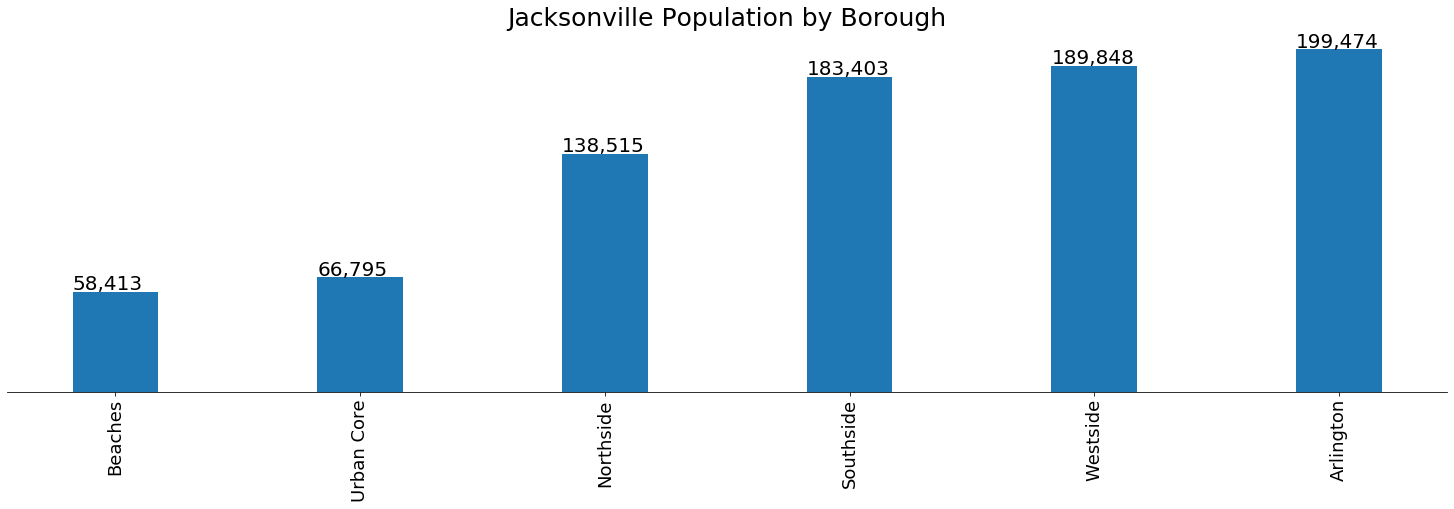

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])

borough = Poptot['Borough']
y_pos = np.arange(len(borough))

population = Poptot['Population']
ax.bar(borough,population, width=0.35)
ax.set_title('Jacksonville Population by Borough', fontsize=25)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
for bar in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(bar.get_x(), bar.get_height()+1000,str(format(bar.get_height(), ",")), fontsize=20)

plt.yticks(fontsize=18)
plt.xticks(rotation=90,fontsize=18)
plt.show()

### Latitude and longitude data by zip code 

In [8]:
zipsFile=pd.read_csv('zip_code_database.csv')
zipsUSPSLatLon = zipsFile[['zip','latitude','longitude']]
zipsUSPSLatLon

,zip,latitude,longitude
0,501,40.81,-73.04
1,544,40.81,-73.04
2,601,18.16,-66.72
3,602,18.38,-67.18
4,603,18.43,-67.15
...,...,...,...
42627,99926,55.14,-131.49
42628,99927,56.30,-133.57
42629,99928,55.45,-131.79
42630,99929,56.41,-131.61


### Merge Neighborhood dataframe and geosptial data for Jacksonville

In [9]:
Zips=boroughZips.merge(zipsUSPSLatLon, left_on='Zip Codes', right_on='zip')
#Zips=Zips.filter(['Zip Codes','Borough','zi','Latitude','Longitude'], axis=1)
Zips= Zips[['Borough','Zip Codes','latitude','longitude','Population']]
Zips.head()

,Borough,Zip Codes,latitude,longitude,Population
0,Urban Core,32202,30.33,-81.65,7915
1,Urban Core,32204,30.32,-81.68,6906
2,Westside,32205,30.30,-81.72,28225
3,Urban Core,32206,30.35,-81.64,17669
4,Arlington,32207,30.29,-81.64,3306


### Map of Jacksonville with zip code markers using Matplotlib.

In [1]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    pandas-1.0.3               |   py36h830a2c2_1        11.1 MB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-

In [10]:
# add markers to map
map_Jacksonville = folium.Map(location=[30.336944, -81.661389], zoom_start=12)
for borough, zips,pop, latitude, longitude in zip(Zips['Borough'], Zips['Zip Codes'],Zips['Population'],Zips['latitude'],Zips['longitude']):
    label = '{}, {}, {}'.format(zips, borough,('Population: ',pop))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Jacksonville)  
    
map_Jacksonville

### Use the zip code data with Foursquare data to find venues by Jacksonville zip code.

In [55]:
# @hidden_cell
CLIENT_ID = '2PZGGUE5VDF05HTWQKFHPZCS3IF2K0UPLFCHE1TCBNU2H2SL' # your Foursquare ID
CLIENT_SECRET = 'K3VSCPD4ZK3HVF1NPID5UBDBMXBN45WTMUWAZANDLGNIRFYG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
ACCESS_TOKEN = 'FCE2VLM2KJ10JJECPXXN1TQACGAIS4CAZJ1UNOXS1EEQKGXO'


In [12]:
Zips=Zips[['Borough','Zip Codes','latitude','longitude']]
def getNearbyVenues(boroughs,zips, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for boroughs,zips, lat, lng in zip(boroughs,zips, latitudes, longitudes):
        print (boroughs,zips)         
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            boroughs,
            zips, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough',
                  'Zip Code',           
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
jacksonville_venues = getNearbyVenues(boroughs=Zips['Borough'],
                                      zips=Zips['Zip Codes'],
                                      latitudes=Zips['latitude'],
                                      longitudes=Zips['longitude']
                                  )
jacksonville_venues.head()

Urban Core 32202
Urban Core 32204
Westside 32205
Urban Core 32206
Arlington 32207
Northside 32208
Urban Core 32209
Westside 32210
Arlington 32211
Westside 32212
Arlington 32216
Southside 32217
Northside 32218
Northside 32219
Northside 32220
Westside 32221
Westside 32222
Southside 32223
Southside 32224
Arlington 32225
Northside 32226
Beaches 32227
Beaches 32233
Westside 32234
Westside 32244
Arlington 32246
Beaches 32250
Northside 32254
Southside 32256
Southside 32257
Southside 32258
Beaches 32266
Arlington 32277


,Borough,Zip Code,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Urban Core,32202,30.33,-81.65,Redbox,30.331273,-81.652633,Video Store
1,Urban Core,32202,30.33,-81.65,Harvey's Supermarket,30.330947,-81.651863,Grocery Store
2,Urban Core,32202,30.33,-81.65,Family Dollar,30.332724,-81.653231,Discount Store
3,Urban Core,32202,30.33,-81.65,Winn-dixie,30.330840,-81.651657,Grocery Store
4,Urban Core,32202,30.33,-81.65,No Compromise Records,30.329086,-81.651305,Record Shop


### Below is summary of the restaurant venue category. The majority of the restaurant are fast food.

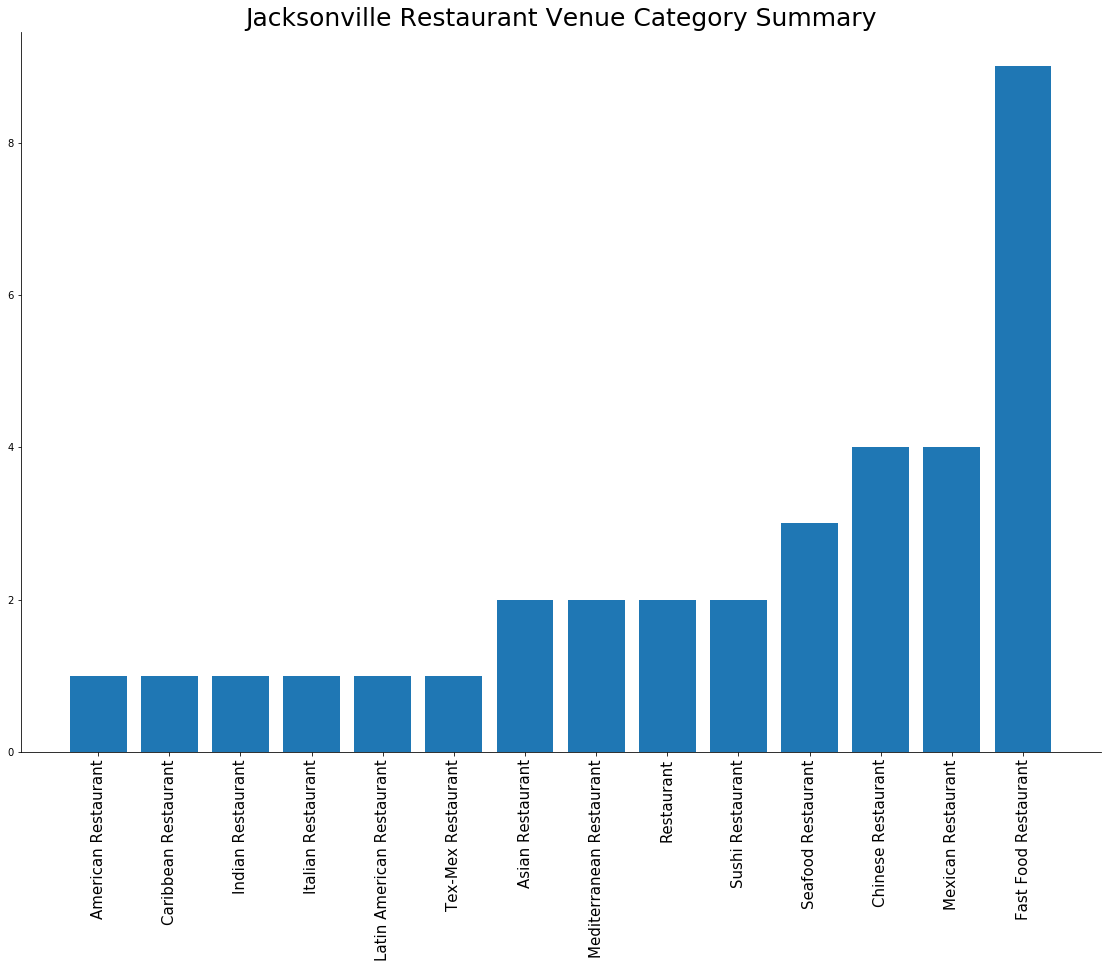

In [37]:
jacksonville_venues2=jacksonville_venues.groupby('Venue Category').count().reset_index()
jacksonville_venues2
sub ='Restaurant'
jacksonville_venues2["Indexes"]= jacksonville_venues2["Venue Category"].str.find(sub) 
is_Restaurant =  jacksonville_venues2['Indexes']!=-1
jacksonville_venues2 =  jacksonville_venues2[is_Restaurant].reset_index(drop=True) 
jacksonville_venues2.sort_values(by=['Borough'],inplace=True)
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
ven = jacksonville_venues2['Venue Category']
y_pos = np.arange(len(ven))
borough = jacksonville_venues2['Borough']
ax.bar(ven,borough)
ax.set_title('Jacksonville Restaurant Venue Category Summary', fontsize=25)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xticks(rotation=90,fontsize=15)
plt.show()

### One hot encoding - the get_dummies() function is used to convert categorical variable into dummy/indicator variables. 

In [38]:
print('There are {} uniques categories.'.format(len(jacksonville_venues['Venue Category'].unique())))
# one hot encoding
jacksonville_onehot = pd.get_dummies(jacksonville_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
jacksonville_onehot['Zip Code'] = jacksonville_venues['Zip Code'] 

# move neighborhood column to the first column
fixed_columns = [jacksonville_onehot.columns[-1]] + list(jacksonville_onehot.columns[:-1])
jacksonville_onehot = jacksonville_onehot[fixed_columns]

jacksonville_grouped = jacksonville_onehot.groupby('Zip Code').mean().reset_index()
jacksonville_grouped.shape

There are 103 uniques categories.


(25, 104)

In [39]:
jacksonville_grouped.head()

,Zip Code,ATM,Airport,American Restaurant,Art Museum,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bank,...,Speakeasy,Sporting Goods Shop,Sports Bar,Supplement Shop,Sushi Restaurant,Tex-Mex Restaurant,Video Store,Volleyball Court,Wine Bar,Wings Joint
0,32202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0
1,32204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,32205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.4
3,32206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,32207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


### Used function to sort in descending order the five most common venues by zip code.

In [40]:
# a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Zip Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Zip Code'] = jacksonville_grouped['Zip Code']

for ind in np.arange(jacksonville_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(jacksonville_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,32202,Grocery Store,Video Store,Record Shop,Discount Store,Dog Run
1,32204,Sandwich Place,Park,Gay Bar,Playground,Historic Site
2,32205,Wings Joint,Home Service,Food,Smoke Shop,Electronics Store
3,32206,Food,Wings Joint,Fast Food Restaurant,Convenience Store,Cosmetics Shop
4,32207,Motel,Rock Club,BBQ Joint,Wings Joint,Electronics Store


### k-means Clustering Analysis

In [41]:

# import k-means from clustering stage
from sklearn.cluster import KMeans

inertia=[]
# set number of clusters
kclusters = range(1,15)

jacksonville_grouped_clustering = jacksonville_grouped.drop('Zip Code', 1)

# run k-means clustering
for k in kclusters:
    kmeans = KMeans(n_clusters=k, random_state=60,init="k-means++", n_init=25).fit(jacksonville_grouped_clustering)
    inertia.append(kmeans.inertia_)
# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([ 0,  0,  0,  1, 13,  0,  6,  5,  8,  4, 12,  0, 11,  7,  0, 10,  3,
        0,  2,  0,  0,  0,  9,  0,  2], dtype=int32)

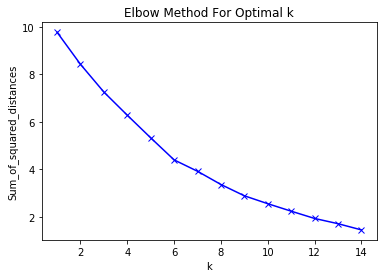

In [42]:
import matplotlib.pyplot as plt
plt.plot(kclusters, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [43]:
print ('Per the graph above the optimal k is 7')

Per the graph above the optimal k is 7


In [44]:
kmeans = KMeans(n_clusters=7, random_state=0,init="k-means++", n_init=10).fit(jacksonville_grouped_clustering)
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
jacksonville_merged = Zips
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
jacksonville_merged = jacksonville_merged.join(neighborhoods_venues_sorted.set_index('Zip Code'), on='Zip Codes')
jacksonville_merged['Cluster Labels'] =jacksonville_merged['Cluster Labels']
jacksonville_merged=jacksonville_merged.dropna()
jacksonville_merged.head()

,Borough,Zip Codes,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Urban Core,32202,30.33,-81.65,0.0,Grocery Store,Video Store,Record Shop,Discount Store,Dog Run
1,Urban Core,32204,30.32,-81.68,0.0,Sandwich Place,Park,Gay Bar,Playground,Historic Site
2,Westside,32205,30.30,-81.72,0.0,Wings Joint,Home Service,Food,Smoke Shop,Electronics Store
3,Urban Core,32206,30.35,-81.64,2.0,Food,Wings Joint,Fast Food Restaurant,Convenience Store,Cosmetics Shop
4,Arlington,32207,30.29,-81.64,0.0,Motel,Rock Club,BBQ Joint,Wings Joint,Electronics Store


In [46]:
#Rename Clusters
jacksonville_merged['Clusters'] = jacksonville_merged['Cluster Labels'].astype(str)
jacksonville_merged["Clusters"].replace({"6.0": "Airport","5.0": "Business Services", "4.0": "Shopping","3.0": "Beaches", "2.0": "Harbor/Marina","1.0": "Parks", "0.0": "Dining/Misc"}, inplace=True)

In [47]:
jacksonville_merged.loc[jacksonville_merged['Cluster Labels'] ==0, jacksonville_merged.columns[[1] + list(range(5, jacksonville_merged.shape[1]))]]

,Zip Codes,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Clusters
1,32204,Sandwich Place,Park,Gay Bar,Playground,Historic Site,Dining/Misc
2,32205,Wings Joint,Home Service,Food,Smoke Shop,Electronics Store,Dining/Misc
3,32206,Food,Wings Joint,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Dining/Misc
4,32207,Motel,Rock Club,BBQ Joint,Wings Joint,Electronics Store,Dining/Misc
5,32208,Fast Food Restaurant,Chinese Restaurant,BBQ Joint,Convenience Store,Discount Store,Dining/Misc
7,32210,Discount Store,Wings Joint,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Dining/Misc
17,32223,Food Truck,Electronics Store,Wings Joint,Fast Food Restaurant,Convenience Store,Dining/Misc
21,32227,Gym,Fast Food Restaurant,Gym / Fitness Center,Baseball Field,Motel,Dining/Misc
25,32246,Food Truck,Grocery Store,ATM,Café,Sandwich Place,Dining/Misc
27,32254,Sandwich Place,Caribbean Restaurant,Seafood Restaurant,Cosmetics Shop,Business Service,Dining/Misc


In [48]:
jacksonville_merged.loc[jacksonville_merged['Cluster Labels'] == 1, jacksonville_merged.columns[[1] + list(range(5, jacksonville_merged.shape[1]))]]

,Zip Codes,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Clusters
8,32211,Park,Dog Run,Lounge,Wings Joint,Gym / Fitness Center,Parks
11,32217,Gym / Fitness Center,Athletics & Sports,Gym Pool,Gym,Grocery Store,Parks
19,32225,Disc Golf,Soccer Field,Wings Joint,Fast Food Restaurant,Convenience Store,Parks


In [49]:
jacksonville_merged.loc[jacksonville_merged['Cluster Labels'] == 2, jacksonville_merged.columns[[1] + list(range(5, jacksonville_merged.shape[1]))]]

,Zip Codes,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Clusters
9,32212,Harbor / Marina,Volleyball Court,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Harbor/Marina


In [50]:
jacksonville_merged.loc[jacksonville_merged['Cluster Labels'] == 3, jacksonville_merged.columns[[1] + list(range(5, jacksonville_merged.shape[1]))]]

,Zip Codes,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Clusters
22,32233,Beach,Baseball Field,Wings Joint,Flower Shop,Cosmetics Shop,Beaches
26,32250,Beach,Bar,Breakfast Spot,Hotel,Cocktail Bar,Beaches
31,32266,Beach,Wings Joint,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Beaches


In [51]:
jacksonville_merged.loc[jacksonville_merged['Cluster Labels'] == 4, jacksonville_merged.columns[[1] + list(range(5, jacksonville_merged.shape[1]))]]

,Zip Codes,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Clusters
0,32202,Grocery Store,Video Store,Record Shop,Discount Store,Dog Run,Shopping
18,32224,Pharmacy,Shop & Service,Playground,Pool,Sculpture Garden,Shopping
20,32226,Flower Shop,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Credit Union,Shopping


In [52]:
jacksonville_merged.loc[jacksonville_merged['Cluster Labels'] == 5, jacksonville_merged.columns[[1] + list(range(5, jacksonville_merged.shape[1]))]]

,Zip Codes,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Clusters
6,32209,Business Service,Wings Joint,Cocktail Bar,Convenience Store,Cosmetics Shop,Business Services
10,32216,Business Service,Restaurant,Wings Joint,Electronics Store,Convenience Store,Business Services


In [53]:
jacksonville_merged.loc[jacksonville_merged['Cluster Labels'] == 6, jacksonville_merged.columns[[1] + list(range(5, jacksonville_merged.shape[1]))]]

,Zip Codes,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Clusters
12,32218,Airport,Parking,General Travel,Wings Joint,Fast Food Restaurant,Airport


###  Jacksonville graph with cluster markers.

In [54]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
bestK=7
# create map
map_clusters = folium.Map(location=[30.336944, -81.661389], zoom_start=11)

# set color scheme for the clusters
x = np.arange(bestK)
ys = [i + x + (i*x)**2 for i in range(bestK)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,clusters in zip(jacksonville_merged['latitude'], jacksonville_merged['longitude'], jacksonville_merged['Zip Codes'], jacksonville_merged['Cluster Labels'],jacksonville_merged['Clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(clusters), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-3],
        fill=True,
        fill_color=rainbow[int(cluster-6)],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters